In [1]:
# example of 1D simulation with DBC and NBC
from fenics import *
import numpy as np

In [2]:
# Create mesh and define function space
# IntervalMesh(nx, a, b)
# nx (int) The number of cells, a (float) The minimum point (inclusive), b (float) The maximum point (inclusive).
mesh = IntervalMesh(300, 0, 2)


In [3]:
V = FunctionSpace(mesh, "P", 1)
u_D = Expression("x[0]-2", degree=1)
f = Constant(0)

In [4]:
# Define boundary condition
u_R = Constant(0)
tol = 1E-14
def boundary_D(x, on_boundary):
    if on_boundary:
        if near(x[0], 2, tol):
            return True
        else:
            return False
    else:
         return False

bc_R = DirichletBC(V, u_R, boundary_D)

In [9]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(v), grad(u))*dx
L = v * ds

In [10]:
# Compute solution
u = Function(V)
solve(a == L, u, bc_R)

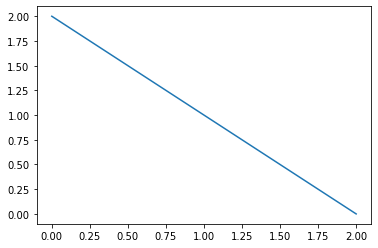

In [11]:
plot(u)
# plot(mesh)

In [16]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, "L2")

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print("error_L2 =", error_L2)
print("error_max =", error_max)

error_L2 = 6.52088110361013e-13
error_max = 6.497025140106416e-13
